In [24]:
import os
import pandas as pd
import koreanize_matplotlib

data_folder = 'data'
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# KGUWTHRDLVRDF 파일(컬럼명 있는 파일) 찾기
col_file = None
for f in csv_files:
    if 'KGUWTHRDLVRDF' in f:
        col_file = f
        break

# 컬럼명 추출
if col_file is not None:
    col_file_path = os.path.join(data_folder, col_file)
    col_names = pd.read_csv(col_file_path, nrows=0).columns.tolist()
else:
    raise ValueError("KGUWTHRDLVRDF 파일을 찾을 수 없습니다.")

df_list = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    if file == col_file:
        df_temp = pd.read_csv(file_path)
    else:
        df_temp = pd.read_csv(file_path, header=None, names=col_names)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()


(380841, 27)


,BRTC_NM,SIGNGU_NM,DE,HRLY_TIME,PRCPT_TY_NM,HD_VALUE,PRCPT_QY_VALUE,TMPRT_VALUE,WS_VALUE,WIND_IN_TY_NM,...,SLICEFISH_DLVR_CASCNT,CHICKEN_DLVR_CASCNT,PIZZA_DLVR_CASCNT,ASI-WESFD_DLVR_CASCNT,CHINESSFD_DLVR_CASCNT,JOKB-BOSAM_ORDER_CASCNT,MIDNIFD_DLVR_CASCNT,STEAM-SOUP_DLVR_CASCNT,LUNCHBOX_DLVR_CASCNT,FASTFD_DLVR_CASCNT
0,강원도,강릉시,2019-08-02,19,없음,83.0,0.0,25.4,0.3,약,...,0,0,0,0,0,0,0,0,0,0
1,강원도,강릉시,2019-08-03,15,없음,83.0,0.0,25.7,0.6,약,...,0,0,0,0,0,0,0,0,0,0
2,강원도,강릉시,2019-08-03,16,없음,83.0,0.0,25.4,0.2,약,...,0,0,0,0,0,0,0,0,0,0
3,강원도,강릉시,2019-08-04,11,없음,86.0,0.0,27.3,1.2,약,...,0,0,0,0,0,0,0,0,0,0
4,강원도,강릉시,2019-08-04,14,없음,89.0,0.0,26.2,1.1,약,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import pandas as pd

# data 폴더 내의 모든 엑셀 확장자 파일(.xls, .xlsx) 찾기
excel_files = [f for f in os.listdir(data_folder) if f.endswith('.xls') or f.endswith('.xlsx')]

excel_df_list = []
for excel_file in excel_files:
    excel_path = os.path.join(data_folder, excel_file)
    df_excel = pd.read_excel(excel_path)
    excel_df_list.append(df_excel)

# 여러 엑셀 파일을 하나의 데이터프레임으로 합치기 (필요시)
if excel_df_list:
    df_excel_all = pd.concat(excel_df_list, ignore_index=True)
    display(df_excel_all.head())
else:
    print("엑셀 파일이 없습니다.")



/Users/corazzon/codes/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,순번,컬럼한글명,컬럼영문명,데이터설명,데이터유형,데이터타입,데이터길이,필수여부,식별자여부,허용값설명,포맷설명,예시설명
0,1,광역시도명,BRTC_NM,광역시도명,문자(가변길이),Varchar,8,Y,N,NaN,NaN,강원도
1,2,시군구명,SIGNGU_NM,시군구명,문자(가변길이),Varchar,10,Y,N,NaN,NaN,강릉시
2,3,날짜,DE,날짜,날짜,Date,NaN,Y,N,NaN,(YYYY-MM-DD),43679
3,4,시간대별 시간,HRLY_TIME,시간대별,문자(가변길이),Varchar,2,Y,N,NaN,(00: 자정 02:새벽 2시 22:오후 10시),19
4,5,강수 유형명,PRCPT_TY_NM,강수 타입,문자(가변길이),Varchar,10,Y,N,NaN,"(없음, 비, 진눈개비, 눈)",없음


In [26]:
# df_excel_all에서 컬럼한글명과 컬럼영문명을 가져와서 df의 컬럼명을 컬럼한글명으로 변경
if '컬럼한글명' in df_excel_all.columns and '컬럼영문명' in df_excel_all.columns:
    # 컬럼영문명-컬럼한글명 매핑 딕셔너리 생성
    col_map = dict(zip(df_excel_all['컬럼영문명'], df_excel_all['컬럼한글명']))
    # df의 컬럼명을 한글명으로 변경
    df.rename(columns=col_map, inplace=True)
else:
    print("df_excel_all에 '컬럼한글명' 또는 '컬럼영문명' 컬럼이 없습니다.")

In [27]:
col_map

{'BRTC_NM': '광역시도명',
 'SIGNGU_NM': '시군구명',
 'DE': '날짜',
 'HRLY_TIME': '시간대별 시간',
 'PRCPT_TY_NM': '강수 유형명',
 'HD_VALUE': '습도값',
 'PRCPT_QY_VALUE': '강수량 값',
 'TMPRT_VALUE': '기온값',
 'WS_VALUE': '풍속값',
 'WIND_IN_TY_NM': '바람강도 유형명',
 'EAST_WST_WIND_TY_NM': '동쪽서쪽바람유형명',
 'WD_VALUE': '풍향값',
 'WD_CTGRY_NM': '풍향카테고리명',
 'KORFD_DLVR_CASCNT': '한식_배달건수',
 'SNACKFD_DLVR_CASCNT': '분식_배달건수',
 'CAFE_DSERT_DLVR_CASCNT': '카페/디저트_배달건수',
 'PKCUT_JPFD_DLVR_CASCNT': '돈까스/일식_배달건수',
 'SLICEFISH_DLVR_CASCNT': '회_배달건수',
 'CHICKEN_DLVR_CASCNT': '치킨_배달건수',
 'PIZZA_DLVR_CASCNT': '피자_배달건수',
 'ASI_WESFD_DLVR_CASCNT': '아시안/양식_배달건수',
 'CHINESSFD_DLVR_CASCNT': '중식_배달건수',
 'JOKB_BOSAM_ORDER_CASCNT': '족발/보쌈_배달건수',
 'MIDNIFD_DLVR_CASCNT': '야식_배달건수',
 'STEAM_SOUP_DLVR_CASCNT': '찜탕_배달건수',
 'LUNCHBOX_DLVR_CASCNT': '도시락_배달건수',
 'FASTFD_DLVR_CASCNT': '패스트푸드_배달건수'}

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380841 entries, 0 to 380840
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   광역시도명                    380841 non-null  object 
 1   시군구명                     380841 non-null  object 
 2   날짜                       380841 non-null  object 
 3   시간대별 시간                  380841 non-null  int64  
 4   강수 유형명                   380841 non-null  object 
 5   습도값                      380841 non-null  float64
 6   강수량 값                    380841 non-null  float64
 7   기온값                      380841 non-null  float64
 8   풍속값                      380841 non-null  float64
 9   바람강도 유형명                 380841 non-null  object 
 10  동쪽서쪽바람유형명                380841 non-null  object 
 11  풍향값                      380841 non-null  int64  
 12  풍향카테고리명                  380841 non-null  object 
 13  한식_배달건수                  380841 non-null  int64  
 14  분식_배

In [29]:
df.describe()

,시간대별 시간,습도값,강수량 값,기온값,풍속값,풍향값,한식_배달건수,분식_배달건수,CAFE-DSERT_DLVR_CASCNT,PKCUT-JPFD_DLVR_CASCNT,회_배달건수,치킨_배달건수,피자_배달건수,ASI-WESFD_DLVR_CASCNT,중식_배달건수,JOKB-BOSAM_ORDER_CASCNT,야식_배달건수,STEAM-SOUP_DLVR_CASCNT,도시락_배달건수,패스트푸드_배달건수
count,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000,380841.000000
mean,14.849152,73.240796,0.160914,12.518162,1.248627,169.590068,3.767084,3.537954,2.556476,1.331283,0.546509,6.624318,1.428953,0.682311,0.918010,2.935109,1.168834,1.118483,0.326614,2.026394
std,5.783456,22.465208,1.137331,9.603017,1.123044,113.461292,9.859405,7.396010,4.977662,3.835876,1.828718,16.169536,3.409746,1.998960,3.054818,10.256248,4.124732,3.335713,1.381308,4.629763
min,0.000000,-1.000000,-0.400000,-18.700000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,61.000000,0.000000,4.400000,0.400000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,78.000000,0.000000,12.900000,1.000000,176.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,91.000000,0.000000,21.100000,1.800000,273.000000,3.000000,4.000000,3.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000
max,23.000000,100.000000,87.500000,36.400000,17.800000,360.000000,258.000000,128.000000,156.000000,70.000000,52.000000,329.000000,58.000000,39.000000,64.000000,301.000000,107.000000,71.000000,60.000000,68.000000


In [30]:
df.head()

,광역시도명,시군구명,날짜,시간대별 시간,강수 유형명,습도값,강수량 값,기온값,풍속값,바람강도 유형명,...,회_배달건수,치킨_배달건수,피자_배달건수,ASI-WESFD_DLVR_CASCNT,중식_배달건수,JOKB-BOSAM_ORDER_CASCNT,야식_배달건수,STEAM-SOUP_DLVR_CASCNT,도시락_배달건수,패스트푸드_배달건수
0,강원도,강릉시,2019-08-02,19,없음,83.0,0.0,25.4,0.3,약,...,0,0,0,0,0,0,0,0,0,0
1,강원도,강릉시,2019-08-03,15,없음,83.0,0.0,25.7,0.6,약,...,0,0,0,0,0,0,0,0,0,0
2,강원도,강릉시,2019-08-03,16,없음,83.0,0.0,25.4,0.2,약,...,0,0,0,0,0,0,0,0,0,0
3,강원도,강릉시,2019-08-04,11,없음,86.0,0.0,27.3,1.2,약,...,0,0,0,0,0,0,0,0,0,0
4,강원도,강릉시,2019-08-04,14,없음,89.0,0.0,26.2,1.1,약,...,0,0,0,0,0,0,0,0,0,0


In [31]:

df.tail()

,광역시도명,시군구명,날짜,시간대별 시간,강수 유형명,습도값,강수량 값,기온값,풍속값,바람강도 유형명,...,회_배달건수,치킨_배달건수,피자_배달건수,ASI-WESFD_DLVR_CASCNT,중식_배달건수,JOKB-BOSAM_ORDER_CASCNT,야식_배달건수,STEAM-SOUP_DLVR_CASCNT,도시락_배달건수,패스트푸드_배달건수
380836,충청북도,충주시,2020-06-30,16,비,96.0,2.4,17.0,1.0,약,...,0,1,0,0,0,0,0,0,0,0
380837,충청북도,충주시,2020-06-30,17,비,97.0,3.2,16.7,1.6,약,...,0,2,0,0,0,0,0,0,0,0
380838,충청북도,충주시,2020-06-30,18,없음,97.0,1.2,16.8,1.1,약,...,0,3,0,0,0,0,0,0,0,0
380839,충청북도,충주시,2020-06-30,19,없음,97.0,0.0,16.8,1.0,약,...,3,0,0,0,0,0,0,0,0,0
380840,충청북도,충주시,2020-06-30,23,없음,89.0,0.0,18.5,1.7,약,...,0,2,0,0,0,0,0,0,0,0


In [32]:

df.sample(10)
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().sum().sum() / df.shape[0] * 100
df.isnull().sum().sum() / df.shape[0] * 100

np.float64(0.0)

In [33]:
df["강수 유형명"].value_counts()

강수 유형명
없음      356238
비        23554
눈          672
진눈개비       377
Name: count, dtype: int64

In [36]:
display(df['광역시도명'].value_counts())
display(df['시군구명'].value_counts())
display(df['강수 유형명'].value_counts())
display(df['강수 유형명'].value_counts())

광역시도명
경기도        127340
서울특별시       68068
경상북도        23667
경상남도        22209
대구광역시       20292
대전광역시       19397
전라남도        13573
충청남도        13203
부산광역시       13135
충청북도        11014
인천광역시       10648
전라북도        10543
광주광역시        9757
강원도          9195
제주특별자치도      8371
울산광역시         429
Name: count, dtype: int64

시군구명
서구      11663
의정부시     9397
동구       9310
강서구      8269
서귀포시     7621
        ...  
청양군         1
의성군         1
영암군         1
함안군         1
옥천군         1
Name: count, Length: 183, dtype: int64

강수 유형명
없음      356238
비        23554
눈          672
진눈개비       377
Name: count, dtype: int64

강수 유형명
없음      356238
비        23554
눈          672
진눈개비       377
Name: count, dtype: int64

In [34]:
# 강수 유형명(y) 예측 모델 작성

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 사용할 feature 선택 (object 타입 및 y 제외)
X = df.drop(columns=["강수 유형명", "광역시도명", "시군구명", "날짜"])
y = df["강수 유형명"]

# 범주형 feature 인코딩 (필요시)
X = X.copy()
for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype("category").cat.codes

# 결측치 처리 (간단히 0으로 대체)
X = X.fillna(0)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9760795074111516
              precision    recall  f1-score   support

           눈       0.83      0.41      0.55       135
           비       0.84      0.79      0.81      4711
          없음       0.98      0.99      0.99     71248
        진눈개비       0.87      0.35      0.50        75

    accuracy                           0.98     76169
   macro avg       0.88      0.63      0.71     76169
weighted avg       0.98      0.98      0.98     76169



Feature importances:
강수량 값: 0.5614
습도값: 0.0717
기온값: 0.0665
풍향값: 0.0469
풍속값: 0.0436
시간대별 시간: 0.0338
풍향카테고리명: 0.0225
CAFE-DSERT_DLVR_CASCNT: 0.0200
치킨_배달건수: 0.0183
한식_배달건수: 0.0149
분식_배달건수: 0.0143
패스트푸드_배달건수: 0.0120
JOKB-BOSAM_ORDER_CASCNT: 0.0116
피자_배달건수: 0.0095
STEAM-SOUP_DLVR_CASCNT: 0.0091
야식_배달건수: 0.0079
PKCUT-JPFD_DLVR_CASCNT: 0.0078
중식_배달건수: 0.0070
ASI-WESFD_DLVR_CASCNT: 0.0067
회_배달건수: 0.0056
도시락_배달건수: 0.0042
바람강도 유형명: 0.0028
동쪽서쪽바람유형명: 0.0018


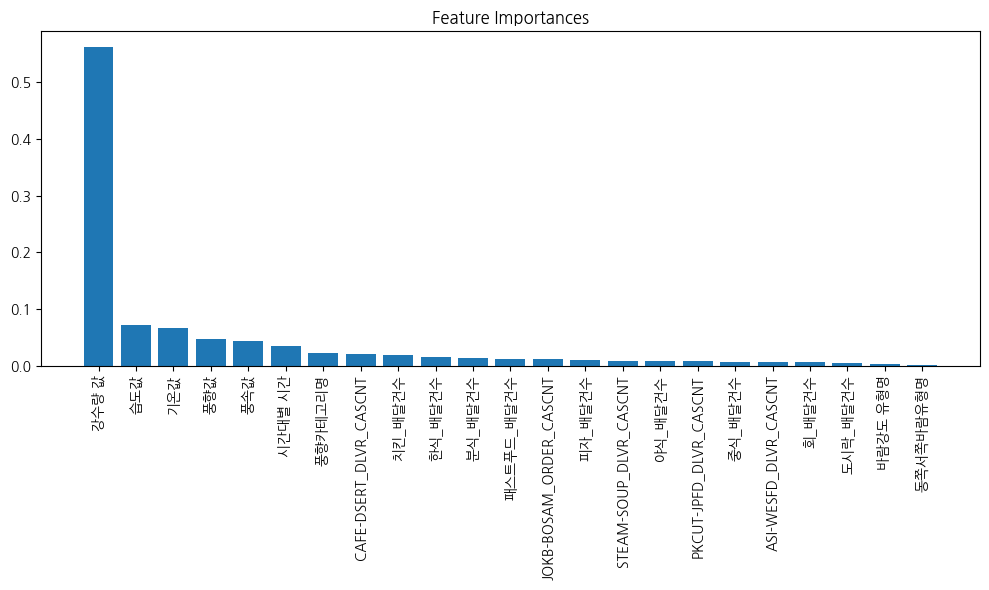

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 피처 중요도 추출
importances = clf.feature_importances_
feature_names = X.columns

# 중요도 내림차순 정렬
indices = np.argsort(importances)[::-1]

# 중요도 출력
print("Feature importances:")
for f in range(len(feature_names)):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
